# Time Series Classification in sktime

In this notebook, we will demonstrate a quick run through of `sktime` for time series classification (TSC).

TSC problems have a single (univariate) or multiple (multivariate) time series variable(s) and an associated label for multiple instances.

The goal of a classifier is to learn the relationship between time series and label and accurately predict the label of new series.

We will cover loading datasets and the data formats used by `sktime` classifiers, using `sktime` classifiers for training models and making predictions and using our experiments pipeline to output results in our format.

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sktime.classification.interval_based._cif import CanonicalIntervalForest
from sktime.classification.shapelet_based import ROCKETClassifier
from sktime.datasets import load_italy_power_demand, load_basic_motions, \
    load_UCR_UEA_dataset
from sktime.utils.data_io import load_from_tsfile_to_dataframe as load_ts
from sktime.utils.data_processing import from_nested_to_3d_numpy

### Loading datasets

There are 3 primary methods for loading time series datasets in `sktime`.
More details are available in the loading data notebook `loading_data.ipynb` in the main sktime project.

The first and most generally useful of the methods for development loads data directly from http://www.timeseriesclassification.com/, which store the UCR/UEA TSC archive of datasets.

In [2]:
X, y = load_UCR_UEA_dataset("GunPoint", return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

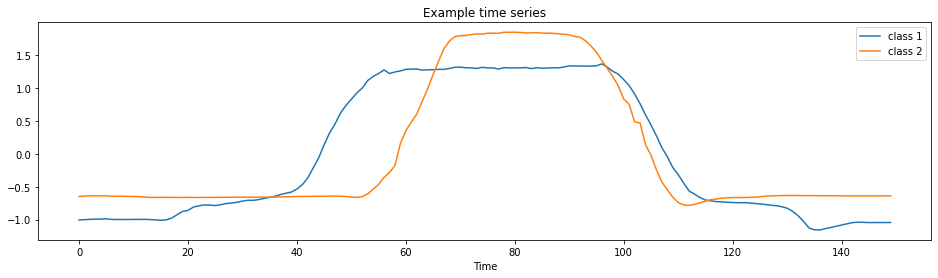

In [3]:
labels, counts = np.unique(y_train, return_counts=True)
fig, ax = plt.subplots(1, figsize=plt.figaspect(0.25))
for label in labels:
    X_train.loc[y_train == label, "dim_0"].iloc[0].plot(ax=ax, label=f"class {label}")
plt.legend()
ax.set(title="Example time series", xlabel="Time");

Some of the smaller datasets are stored as part of the `sktime` package.
These datasets can be loaded using specific functions and are important for unit testing.

In [4]:
X, y = load_italy_power_demand(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

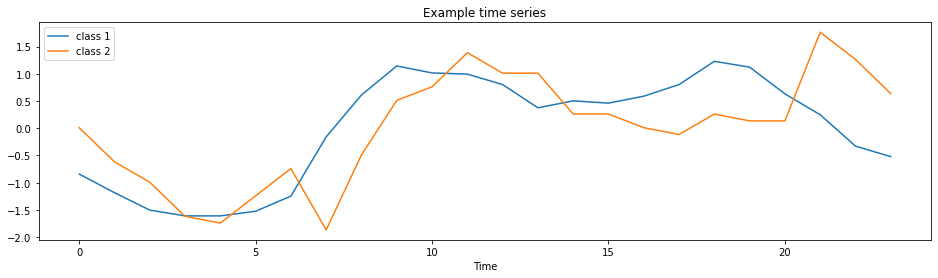

In [5]:
labels, counts = np.unique(y_train, return_counts=True)
fig, ax = plt.subplots(1, figsize=plt.figaspect(0.25))
for label in labels:
    X_train.loc[y_train == label, "dim_0"].iloc[0].plot(ax=ax, label=f"class {label}")
plt.legend()
ax.set(title="Example time series", xlabel="Time");

Lastly datasets can be loaded directly from file.
The primary format used for dataset files in `sktime` is `.ts`.
Use these for datasets which are not part of the UCR/UEA archive or you are comparing to someone elses results and need specific train and test splits.

In [6]:
# load_from_tsfile_to_dataframe
X_train, y_train = load_ts("ArrowHead_TRAIN.ts")
X_test, y_test = load_ts("ArrowHead_TEST.ts")

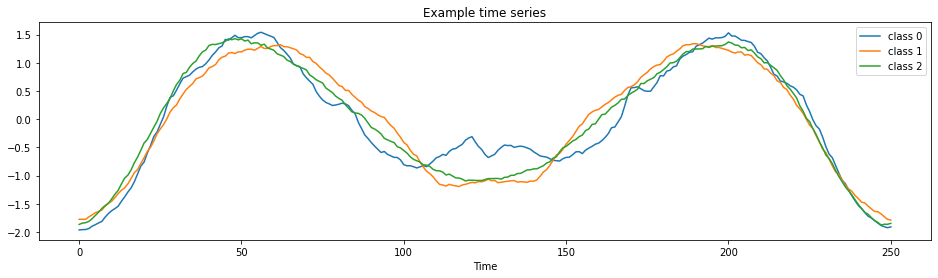

In [7]:
labels, counts = np.unique(y_train, return_counts=True)
fig, ax = plt.subplots(1, figsize=plt.figaspect(0.25))
for label in labels:
    X_train.loc[y_train == label, "dim_0"].iloc[0].plot(ax=ax, label=f"class {label}")
plt.legend()
ax.set(title="Example time series", xlabel="Time");

### Data formats

nested pandas dataframe

In [8]:
X_train.head()

,dim_0
0,0 -1.9630 1 -1.9578 2 -1.9561 3 ...
1,0 -1.7746 1 -1.7740 2 -1.7766 3 ...
2,0 -1.8660 1 -1.8420 2 -1.8350 3 ...
3,0 -2.0738 1 -2.0733 2 -2.0446 3 ...
4,0 -1.7463 1 -1.7413 2 -1.7227 3 ...


In [9]:
y.head()

0    1
1    1
2    2
3    2
4    1
dtype: object

3d numpy array

In [10]:
from_nested_to_3d_numpy(X)[:5]

array([[[-0.71052 , -1.1833  , -1.3724  , -1.5931  , -1.467   ,
         -1.3724  , -1.0888  ,  0.045967,  0.92853 ,  1.0861  ,
          1.2753  ,  0.96005 ,  0.61333 ,  0.014447, -0.64748 ,
         -0.26923 , -0.20619 ,  0.61333 ,  1.3698  ,  1.4644  ,
          1.0546  ,  0.58181 ,  0.17205 , -0.26923 ]],

       [[-0.99301 , -1.4268  , -1.5799  , -1.6054  , -1.6309  ,
         -1.3758  , -1.0185  , -0.3551  ,  0.71658 ,  1.2014  ,
          1.1248  ,  1.0483  ,  0.79313 ,  0.46142 ,  0.48694 ,
          0.56348 ,  0.61452 ,  0.30832 ,  0.25729 ,  1.0993  ,
          1.0483  ,  0.69107 , -0.048906, -0.38062 ]],

       [[ 1.3191  ,  0.56977 ,  0.19513 , -0.085856, -0.17952 ,
         -0.27318 , -0.085856, -1.3971  , -1.1161  , -0.74149 ,
          0.007805, -0.085856,  0.007805, -0.4605  , -0.55416 ,
         -0.74149 , -0.74149 , -0.74149 , -1.1161  , -0.4605  ,
          0.47611 ,  2.3493  ,  2.2557  ,  1.6001  ]],

       [[-0.81244 , -1.1576  , -1.4164  , -1.5314  , -1.5027  ,


In [11]:
y.to_numpy()[:5]

array(['1', '1', '2', '2', '1'], dtype=object)

### Exercise 2: basic time series classification
#### Univariate classifiers

In [12]:
cif = CanonicalIntervalForest()
cif.fit(X_train, y_train)
cif.score(X_test, y_test)

hi


#### Multivariate classifiers

In [13]:
X_mv, y_mv = load_basic_motions(return_X_y=True)
X_train_mv, X_test_mv, y_train_mv, y_test_mv = train_test_split(X_mv, y_mv)

rocket = ROCKETClassifier()
rocket.fit(X_train_mv, y_train_mv)
rocket.score(X_test_mv, y_test)

hi


#### Pipeline classifiers

(a) build the following time series classifier: a k-nearest neighbor classifier, where both time series distance and the parameter k are tuned using cross-validation grid search

(b) use the classifier in (a) and run the evaluation from exercise 2

(c) build the following time series classifier: a pipeline consisting of a feature extractor that computes mean, variance, and five quartiles for each time series. A grid search tuned support vector classifier (for tabular data, from `sklearn`) is then used to predict the label.

(d) use the classifier in (c) to obtain probabilistic class predictions on a uniformly random 80/20 split, and evaluate using the logartithmic loss

In [14]:
print("hi")

hi


### Configuring Classifiers

a few examples from HIVE-COTE classifiers

n_jobs
contracting

In [15]:
print("hi")

hi


### Experiments

other metrics than accuracy

In [ ]:
print("hi")

### Workshop Tasks

tasks from sheet
